F -> E -> D -> C -> H
Distance: 45


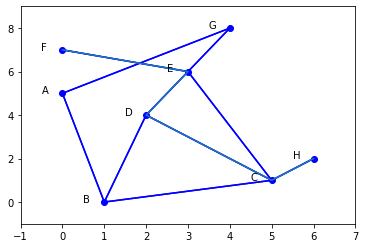

In [62]:
import sys
import matplotlib.pyplot as plt
from pprint import pprint
from functools import reduce

#dict to label points
mylabel = {1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H'}

#dict to derive coordinates
mylabel2 = {
         'A':(0,5),
         'B':(1,0),
         'C':(5,1),
         'D':(2,4),
         'E':(3,6),
         'F':(0,7),
         'G':(4,8),
         'H':(6,2)
           }
#Adjancency and State Matrix
Adj_Matrix = [[0, 20, 0, 0, 0, 0, 15, 0],
             [20, 0, 8, 9, 0, 0, 0, 0],
             [0,  8,  0,  6, 15, 0, 0, 10],
             [0, 9, 6, 0, 7, 0, 0, 0],
             [0, 0, 15, 7, 0, 22, 18, 0],
             [0, 0, 0, 0, 22, 0, 0, 0],
             [15, 0, 0, 0, 18, 0, 0, 0],
             [0, 0, 10, 0, 0, 0, 0, 0]]

xCoord=[mylabel2[k][0] for k in sorted(mylabel2)]
yCoord=[mylabel2[k][1] for k in sorted(mylabel2)]
plt.plot(xCoord, yCoord, 'bo')
plt.axis([-1, 7, -1, 9])
for i in range(8):
    plt.text(xCoord[i]-0.5, yCoord[i], mylabel[i+1])
for i in range(8):
    for j in range(8):
        if Adj_Matrix[i][j]:
            plt.plot([xCoord[i], xCoord[j]],[yCoord[i], yCoord[j]], 'b')
#Dijkstra Algorithm
def dijkstra(graph,start,target):
    inf = reduce(lambda x,y: x+y,(i[1] for u in graph for i in graph[u]))
    dist = dict.fromkeys(graph,inf)
    prev = dict.fromkeys(graph)
    q = list(graph.keys())
    dist[start] = 0
    while q:
        u = min(q, key=lambda x: dist[x])
        q.remove(u)
        for v,w in graph[u]:
            alt = dist[u] + w
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
    #”way”
    trav = []
    temp = target
    while temp != start:
        trav.append(prev[temp])
        temp = prev[temp]
    trav.reverse()
    trav.append(target)
    return " -> ".join(trav),dist[target]

graph = {
    'A' : [('B',20), ('G', 15)],
    'B' : [('A', 20),('C', 8), ('D', 9)],
    'C' : [('B', 8),('D', 6), ('E', 15), ('H', 10)],
    'D' : [('B', 9),('C', 6),('E', 7)],
    'E' : [('C', 15),('D', 7),('F', 22),('G', 18)],
    'F' : [('E', 22)],
    'G' : [('A', 15),('E', 18)],
    'H' : [('C', 10)]
    }
traverse, dist = dijkstra(graph,'F','H')
print(traverse)
#Drawing of coordinates
mydrawing = traverse.split('-> ')
plt.plot([ mylabel2[n.rstrip()][0] for n in mydrawing ],[ mylabel2[n.rstrip()][1] for n in mydrawing])
print("Distance:",dist)
plt.show()

In [91]:
class Node:

    def __init__(self, data, indexLoc = None):
        self.data = data
        self.index = indexLoc


class Graph:

    @classmethod
    def create_from_node(self, nodes):
        return Graph(len(nodes), len(nodes), nodes)


    def __init__(self, row, column, nodes = None):

        self.adj_mat = [[0] * column for _ in range(row)]
        self.nodes = nodes
        for i in range(len(self.nodes)):
            self.nodes[i].index = i


    def get_index_from_node(self, node):

        if not isinstance(node, Node) and not isinstance(node, int):
            raise ValueError('Error. Must be a node.')

        if isinstance(node, int):
            return node
        else:
            return node.index            
            
        
    def connect_node(self, node1, node2, weight = 1):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        self.adj_mat[node1][node2] = weight
        
    
    def connect(self, node1, node2, weight = 1):
        self.connect_node(node1, node2, weight)
        self.connect_node(node2, node1, weight)
        

    def print_adj_matrix(self):
        for row in self.adj_mat:
            print(row)

    
    def get_adj_matrix(self):
        return self.adj_mat

    
    def connection_from(self, node):
        node = self.get_index_from_node(node)
        return [(self.nodes[col_num], self.adj_mat[node][col_num]) for col_num in range(len(self.adj_mat[node])) if self.adj_mat[node][col_num] != 0]
        

    def dijkstra_shortest_path(self, node):
        node_num = self.get_index_from_node(node)
        distance = [None] * len(self.nodes)
        for i in range(len(distance)):
            distance[i] = [float("inf")]
            distance[i].append([self.nodes[node_num]])

        distance[node_num][0] = 0

        queue = [i for i in range(len(self.nodes))]
        seen = set()
        
        while len(queue) > 0:
            min_distance = float("inf")
            min_node = None

            for n in queue:
                if distance[n][0] < min_distance and n not in seen:
                    min_distance = distance[n][0]
                    min_node = n
                    
            queue.remove(min_node)
            seen.add(min_node)

            connections = self.connection_from(min_node)

            for (node, weight) in connections:
                total_distance = weight + min_distance
                
                if total_distance < distance[node.index][0]:
                    distance[node.index][0] = total_distance
                    distance[node.index][1] = list(distance[min_node][1])
                    distance[node.index][1].append(node)
                    
        return distance
        

In [85]:
a = Node("A")
b = Node("B")
c = Node("C")
d = Node("D")
e = Node("E")
f = Node("F")

graph = Graph.create_from_node([a,b,c,d,e,f])

graph.connect(a,b)
graph.connect(a,c)
graph.connect(a,e)
graph.connect(b,c)
graph.connect(b,d)
graph.connect(c,d)
graph.connect(c,f)
graph.connect(d,e)

graph.print_adj_matrix()

adj_mat = graph.get_adj_matrix()

[0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 0]
[1, 1, 0, 1, 0, 1]
[0, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0]


In [86]:
w_graph = Graph.create_from_node([a,b,c,d,e,f])

w_graph.connect(a,b,5)
w_graph.connect(a,c,10)
w_graph.connect(a,e,2)
w_graph.connect(b,c,2)
w_graph.connect(b,d,4)
w_graph.connect(c,d,7)
w_graph.connect(c,f,10)
w_graph.connect(d,e,3)

w_graph.print_adj_matrix()

[0, 5, 10, 0, 2, 0]
[5, 0, 2, 4, 0, 0]
[10, 2, 0, 7, 0, 10]
[0, 4, 7, 0, 3, 0]
[2, 0, 0, 3, 0, 0]
[0, 0, 10, 0, 0, 0]


In [98]:
a = Node("A")
b = Node("B")
c = Node("C")
d = Node("D")
e = Node("E")
f = Node("F")

w_graph = Graph.create_from_node([a,b,c,d,e,f])

w_graph.connect(a,b,5)
w_graph.connect(a,c,10)
w_graph.connect(a,e,2)
w_graph.connect(b,c,2)
w_graph.connect(b,d,4)
w_graph.connect(c,d,7)
w_graph.connect(c,f,10)
w_graph.connect(d,e,3)

print([(weight, [n.data for n in node]) for (weight, node) in w_graph.dijkstra_shortest_path(a)])

[(0, ['A']), (5, ['A', 'B']), (7, ['A', 'B', 'C']), (5, ['A', 'E', 'D']), (2, ['A', 'E']), (17, ['A', 'B', 'C', 'F'])]


In [8]:
# Python program for Dijkstra's single 
# source shortest path algorithm. The program is 
# for adjacency matrix representation of the graph 

# Library for INT_MAX 
import sys 

class Graph(): 

	def __init__(self, vertices): 
		self.V = vertices 
		self.graph = [[0 for column in range(vertices)] 
					for row in range(vertices)] 

	def printSolution(self, dist): 
		print("Vertex \tDistance from Source")
		for node in range(self.V): 
			print(node, "\t", dist[node])

	# A utility function to find the vertex with 
	# minimum distance value, from the set of vertices 
	# not yet included in shortest path tree 
	def minDistance(self, dist, sptSet): 

		# Initilaize minimum distance for next node 
		min = sys.maxsize 

		# Search not nearest vertex not in the 
		# shortest path tree 
		for v in range(self.V): 
			if dist[v] < min and sptSet[v] == False: 
				min = dist[v] 
				min_index = v 

		return min_index 

	# Funtion that implements Dijkstra's single source 
	# shortest path algorithm for a graph represented 
	# using adjacency matrix representation 
	def dijkstra(self, src): 

		dist = [sys.maxsize] * self.V 
		dist[src] = 0
		sptSet = [False] * self.V 

		for cout in range(self.V): 

			# Pick the minimum distance vertex from 
			# the set of vertices not yet processed. 
			# u is always equal to src in first iteration 
			u = self.minDistance(dist, sptSet) 

			# Put the minimum distance vertex in the 
			# shotest path tree 
			sptSet[u] = True

			# Update dist value of the adjacent vertices 
			# of the picked vertex only if the current 
			# distance is greater than new distance and 
			# the vertex in not in the shotest path tree 
			for v in range(self.V): 
				if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]: 
						dist[v] = dist[u] + self.graph[u][v] 

		self.printSolution(dist) 

# Driver program 
g = Graph(9) 
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0], 
		[4, 0, 8, 0, 0, 0, 0, 11, 0], 
		[0, 8, 0, 7, 0, 4, 0, 0, 2], 
		[0, 0, 7, 0, 9, 14, 0, 0, 0], 
		[0, 0, 0, 9, 0, 10, 0, 0, 0], 
		[0, 0, 4, 14, 10, 0, 2, 0, 0], 
		[0, 0, 0, 0, 0, 2, 0, 1, 6], 
		[8, 11, 0, 0, 0, 0, 1, 0, 7], 
		[0, 0, 2, 0, 0, 0, 6, 7, 0] 
		]; 

g.dijkstra(0); 

# This code is contributed by Divyanshu Mehta 


Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14
